# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import cartopy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

# Load dataset for clustering
Source: https://github.com/AshitaPrasad/pymlconf

In [3]:
df_country_med = pd.read_csv("data/med.csv")
df_country_med

Country Name Country Code  gdp_growth_2017  hitech_exports_2017  \
0           Aruba          ABW         1.330511         2.011640e+06   
1     Afghanistan          AFG         2.665292                  NaN   
2          Angola          AGO        -0.147207                  NaN   
3         Albania          ALB         3.836620         1.119016e+06   
4         Andorra          AND         1.724022         2.423542e+07   
..            ...          ...              ...                  ...   
212        Kosovo          XKX         4.227909                  NaN   
213   Yemen, Rep.          YEM        -5.942320                  NaN   
214  South Africa          ZAF         1.414513         2.039078e+09   
215        Zambia          ZMB         3.403169         3.626577e+07   
216      Zimbabwe          ZWE         4.704035         1.120621e+07   

     unemployment_ilo_2017  
0                      NaN  
1                    1.559  
2                    7.139  
3                   13.750  
4                      NaN  
..                     ...  
212                    NaN  
213                 13.175  
214                 27.327  
215                  7.206  
216                  4.943  

[217 rows x 5 columns]

## Cleaning data
- drop NaN rows
- reset index

In [4]:
df_country_med.dropna(inplace = True)
df_country_med.reset_index(drop = True, inplace = True)
df_country_med.head()

Country Name Country Code  gdp_growth_2017  hitech_exports_2017  \
0               Albania          ALB         3.836620         1.119016e+06   
1  United Arab Emirates          ARE         0.790400         2.265683e+10   
2             Argentina          ARG         2.668590         1.494148e+09   
3               Armenia          ARM         7.500000         2.831079e+07   
4             Australia          AUS         2.342582         4.942223e+09   

   unemployment_ilo_2017  
0                 13.750  
1                  2.463  
2                  8.347  
3                 17.827  
4                  5.594

## Explore data
- count
- mean
- std deviation
- min
- max
- P25 / P50 / P75

In [5]:
df_country_med.describe().transpose()

count          mean           std        min  \
gdp_growth_2017        131.0  3.396818e+00  2.208448e+00  -3.481549   
hitech_exports_2017    131.0  1.808094e+10  6.557108e+10  10.000000   
unemployment_ilo_2017  131.0  7.658824e+00  5.475045e+00   1.253000   

                                25%           50%           75%           max  
gdp_growth_2017        2.025076e+00  3.419819e+00  4.695397e+00  8.145296e+00  
hitech_exports_2017    1.637638e+07  2.358589e+08  5.250438e+09  6.541880e+11  
unemployment_ilo_2017  4.120500e+00  6.013000e+00  9.356500e+00  2.732700e+01

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f161367b810>,
      dtype=object)

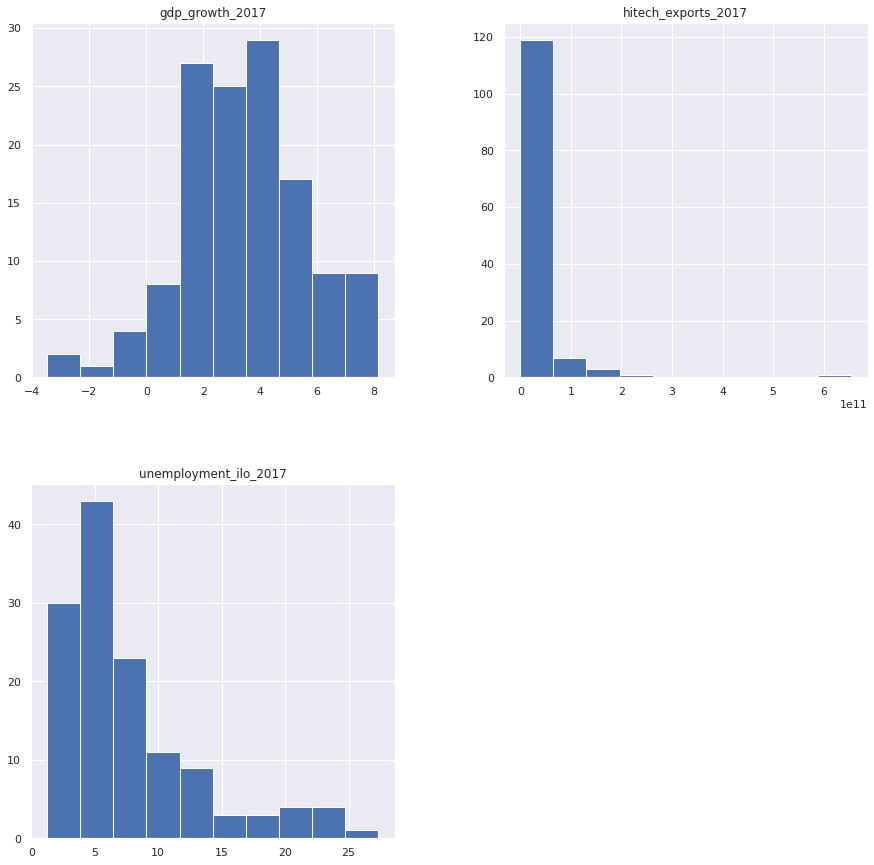

In [6]:
df_country_med.hist(figsize=(15,15))

## Make working dataframe
- Drop country cols
- keep only quantitatives var

In [7]:
df_X = df_country_med.drop(["Country Name","Country Code"], axis = 1)
df_X.head()

gdp_growth_2017  hitech_exports_2017  unemployment_ilo_2017
0         3.836620         1.119016e+06                 13.750
1         0.790400         2.265683e+10                  2.463
2         2.668590         1.494148e+09                  8.347
3         7.500000         2.831079e+07                 17.827
4         2.342582         4.942223e+09                  5.594

## Transform by scaling each feature to a given range.

Transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

The transformation is calculated as::

    X_scaled = scale * X + min - X.min(axis=0) * scale
    where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))

This transformation is often used as an alternative to zero mean,
unit variance scaling.

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_X)
scaler.inverse_transform(X)
print ("Min:", (scaler.inverse_transform(X) - df_X.values).min(),
       "Max:", (scaler.inverse_transform(X) - df_X.values).max())

Min: -3.814697265625e-06 Max: 2.384185791015625e-07


# KMEANS classification
K-Means clustering is all about minimizing the mean-squared distance (MSD) between data observations and their Centroids

## Identify number of clusters by the elbow method

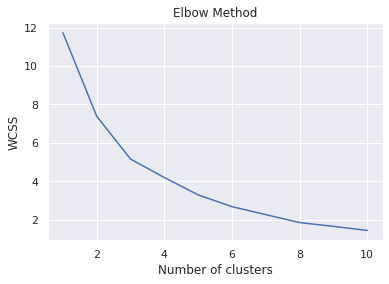

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## BUILD MODEL 

In [10]:
n_clusters = 6
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [11]:
model.cluster_centers_[:, 1]

array([0.00872393, 0.00292054, 0.02173135, 0.02019061, 0.0362888 ,
       1.        ])

## Plot clusters and their centers

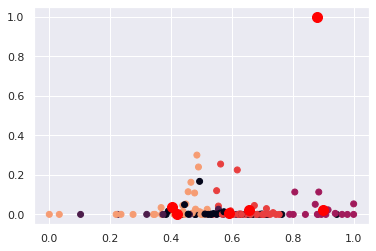

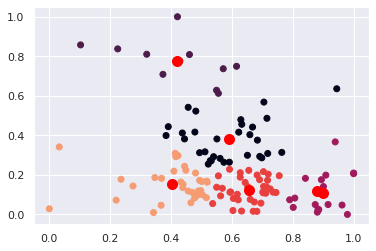

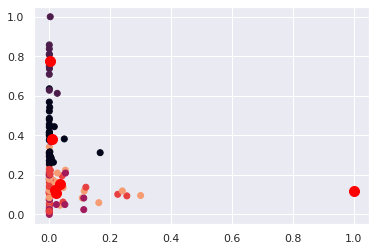

In [12]:
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='red')
plt.show()
plt.scatter(X[:,0], X[:,2], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 2], s=100, c='red')
plt.show()
plt.scatter(X[:,1], X[:,2], c=model.predict(X))
plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], s=100, c='red')
plt.show()

We can see a single point: CHINA, alone in its cluster

## Model computation info

In [13]:
model.n_iter_

6

In [14]:
model.labels_

array([0, 4, 0, 0, 4, 4, 4, 4, 4, 2, 2, 3, 1, 4, 4, 3, 0, 4, 1, 3, 3, 4,
       4, 5, 2, 3, 4, 4, 0, 0, 3, 4, 4, 3, 0, 4, 0, 1, 3, 0, 3, 0, 4, 0,
       2, 0, 1, 3, 0, 3, 0, 3, 3, 2, 2, 0, 3, 3, 0, 0, 0, 4, 3, 0, 3, 3,
       4, 4, 1, 3, 1, 3, 4, 0, 0, 3, 3, 2, 4, 1, 0, 2, 0, 3, 3, 3, 3, 2,
       1, 4, 3, 3, 4, 2, 3, 4, 2, 4, 2, 3, 0, 3, 2, 4, 4, 0, 2, 3, 3, 3,
       4, 0, 4, 0, 3, 4, 1, 3, 0, 2, 2, 3, 0, 0, 4, 1, 2, 0, 1, 3, 3],
      dtype=int32)

In [15]:
model.cluster_centers_

array([[0.58901784, 0.00872393, 0.38042099],
       [0.42032926, 0.00292054, 0.77506679],
       [0.89776849, 0.02173135, 0.11068723],
       [0.65502567, 0.02019061, 0.1248134 ],
       [0.40396652, 0.0362888 , 0.15609419],
       [0.88059629, 1.        , 0.12069495]])

Centroid Interpretation:


In [16]:
centroid_meaning = pd.DataFrame(scaler.inverse_transform(model.cluster_centers_), 
             columns = ["gdp_growth", "hitech_exports", "unemployment_ilo"])
centroid_meaning

gdp_growth  hitech_exports  unemployment_ilo
0    3.366870    5.707090e+09         11.172097
1    1.405554    1.910581e+09         21.462091
2    6.956666    1.421639e+10          4.139059
3    4.134333    1.320846e+10          4.507385
4    1.215307    2.373970e+10          5.323000
5    6.757008    6.541880e+11          4.400000

Meaning of the clusters:

| Cluster id | gdp_growth                          | hitech_exports                      | unemployment_ilo                    |
|------------|-------------------------------------|-------------------------------------|-------------------------------------|
| 0          | <font color='blue'>LOW</font>       | <font color='blue'>LOW</font>       | <font color='red'>HIGH</font>       |
| 1          | <font color='orange'>MEDIUM </font> | <font color='orange'>MEDIUM </font> | <font color='orange'>MEDIUM </font> |
| 2          | <font color='red'>HIGH</font>       | <font color='red'>HIGH</font>       | <font color='blue'>LOW</font>       |
| 3          | <font color='blue'>LOW</font>       | <font color='red'>HIGH</font>       | <font color='orange'>MEDIUM </font> |
| 4          | <font color='orange'>MEDIUM </font> | <font color='blue'>LOW</font>       | <font color='red'>HIGH</font>       |
| 5          | <font color='red'>HIGH</font>       | <font color='orange'>MEDIUM </font> | <font color='blue'>LOW</font>       |

In [17]:
clusters_list = [
    'Low GDP growth, low hitech exports, high unemployment ILO', 
    'Medium GDP growth, medium hitech exports, medium unemployment ILO',
    'High GDP growth, high hitech exports, low unemployment ILO',
    'Low GDP growth, high hitech exports, medium unemployment ILO',
    'Medium GDP growth, low hitech exports, high unemployment ILO',
    'High GDP growth, medium hitech exports, low unemployment ILO',
];
clusters_list

['Low GDP growth, low hitech exports, high unemployment ILO',
 'Medium GDP growth, medium hitech exports, medium unemployment ILO',
 'High GDP growth, high hitech exports, low unemployment ILO',
 'Low GDP growth, high hitech exports, medium unemployment ILO',
 'Medium GDP growth, low hitech exports, high unemployment ILO',
 'High GDP growth, medium hitech exports, low unemployment ILO']

## Add cluster id to the original dataframe

In [19]:
df_final = df_country_med.copy()
df_final["clusterId"] = model.labels_
df_final.head()

Country Name Country Code  gdp_growth_2017  hitech_exports_2017  \
0               Albania          ALB         3.836620         1.119016e+06   
1  United Arab Emirates          ARE         0.790400         2.265683e+10   
2             Argentina          ARG         2.668590         1.494148e+09   
3               Armenia          ARM         7.500000         2.831079e+07   
4             Australia          AUS         2.342582         4.942223e+09   

   unemployment_ilo_2017  clusterId  
0                 13.750          0  
1                  2.463          4  
2                  8.347          0  
3                 17.827          0  
4                  5.594          4

## Geo data loading

In [21]:
def plot_map(gdf1, gdf2, name):
    """
    Plot a Map considering all the clusters for:
    - gdf1 : geodataframe of the countries
    - gdf2 : geodataframe of the graticules
    - name: name of the map
    """
    sns.reset_orig()
    fig, ax = plt.subplots(figsize=(12,10))
    gdf1.plot(
        ax=ax, 
        column='clusterId',
        #cmap= 'terrain', 
        legend=True,
        legend_kwds={'label': "Cluster ID",'orientation': "horizontal"},
        missing_kwds={'color': 'lightgrey', 'label': 'Missing values'}, 
        zorder=2)
    gdf2.plot(
        ax=ax, 
        color="lightgray", 
        linewidth=0.5, 
        zorder=1)
    ax.set(
        xlabel="X Coordinate",
        ylabel="Y Coordinate",
        title=name)
    

In [22]:
def plot_cluster(gdf1, gdf2, clusterId, name):
    """
    Plot a Map considering:
    - gdf1 : geodataframe of the countries
    - gdf2 : geodataframe of the graticules
    - clusterId: name of the colum dedicated to this cluster number
    - name: name of the map
    """
    sns.reset_orig()
    fig, ax = plt.subplots(figsize=(12,10))
    gdf1.plot(
        ax=ax, 
        column='cluster_'+str(clusterId),
        #cmap= 'terrain', 
        #legend=True,
        missing_kwds={'color': 'lightgrey'}, 
        zorder=2)
    gdf2.plot(
        ax=ax, 
        color="lightgray", 
        linewidth=0.5, 
        zorder=1)
    ax.set(
        xlabel="X Coordinate",
        ylabel="Y Coordinate",
        title=name)
    ax.text(0.95, 0.01, 'Source: TBC',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)


Load graticules (5°) for display purpose

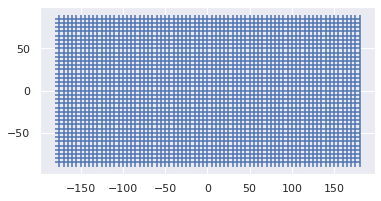

In [23]:
# Prepare graticules
graticules = gpd.read_file("./data/graticules/ne_10m_graticules_5.shp")
graticules.plot()

Load Natural Earth countries data

In [25]:
df_country = gpd.read_file("./data/natural_earth/ne_110m_admin_0_countries.shp")
df_country.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...  
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...

Join with the initial data on the ISO code (3 letters)

In [26]:
geo_result = df_country.merge(df_final, left_on='iso_a3', right_on='Country Code', how='left')
geo_result.head()

iso_a3                  name      continent     pop_est  gdp_md_est  \
0    AFG           Afghanistan           Asia  34124811.0     64080.0   
1    AGO                Angola         Africa  29310273.0    189000.0   
2    ALB               Albania         Europe   3047987.0     33900.0   
3    ARE  United Arab Emirates           Asia   6072475.0    667200.0   
4    ARG             Argentina  South America  44293293.0    879400.0   

                                            geometry          Country Name  \
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...                   NaN   
1  MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...                   NaN   
2  POLYGON ((21.02004 40.84273, 20.99999 40.58000...               Albania   
3  POLYGON ((51.57952 24.24550, 51.75744 24.29407...  United Arab Emirates   
4  MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...             Argentina   

  Country Code  gdp_growth_2017  hitech_exports_2017  unemployment_ilo_2017  \
0          NaN              NaN                  NaN                    NaN   
1          NaN              NaN                  NaN                    NaN   
2          ALB          3.83662         1.119016e+06                 13.750   
3          ARE          0.79040         2.265683e+10                  2.463   
4          ARG          2.66859         1.494148e+09                  8.347   

   clusterId  
0        NaN  
1        NaN  
2        0.0  
3        4.0  
4        0.0

## Basic visualisation without graticules

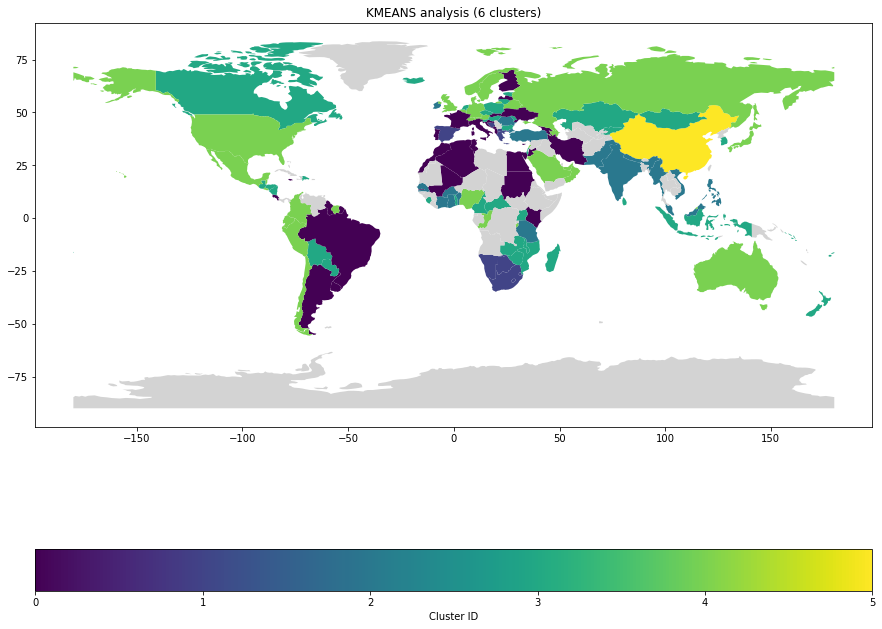

In [27]:
sns.reset_orig()
# EPSG:4326
geo_result.plot( #cmap= 'terrain',
                legend=True,
                legend_kwds={'label': "Cluster ID",'orientation': "horizontal"},
                figsize=(15,15),
                column='clusterId',
                missing_kwds={'color': 'lightgrey', 'label': 'Missing values'}
               )
plt.title("KMEANS analysis (" + str(n_clusters) + " clusters)")
plt.savefig('KMEANS_full_mercator.png')


## Basic visualisation with graticules

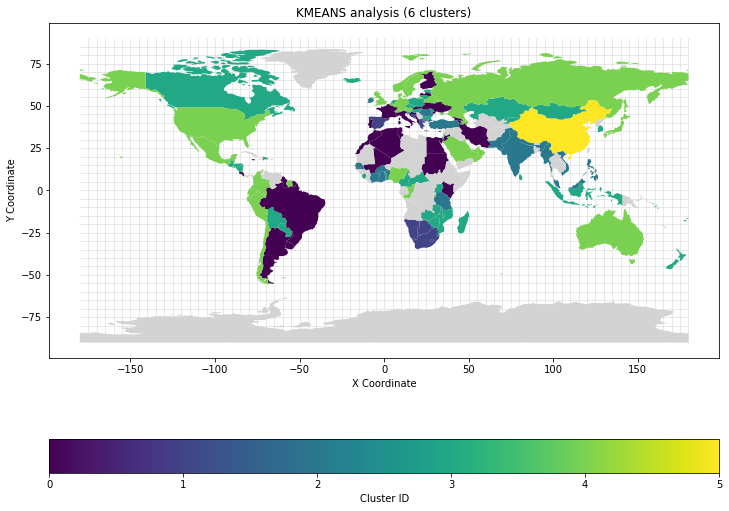

In [28]:
plt.show()
plot_map(geo_result, graticules, "KMEANS analysis (" + str(n_clusters) + " clusters)")
plt.savefig('KMEANS_full_mercator_with_graticules.png')

### Reproject in Molleide babinet coordinate system

In [29]:
# countries and classif results
geo_result_mollweide=geo_result.copy()
geo_result_mollweide = geo_result.to_crs("ESRI:54009")

# graticules
graticules_mollweide=graticules.copy()
graticules_mollweide = graticules.to_crs("ESRI:54009")

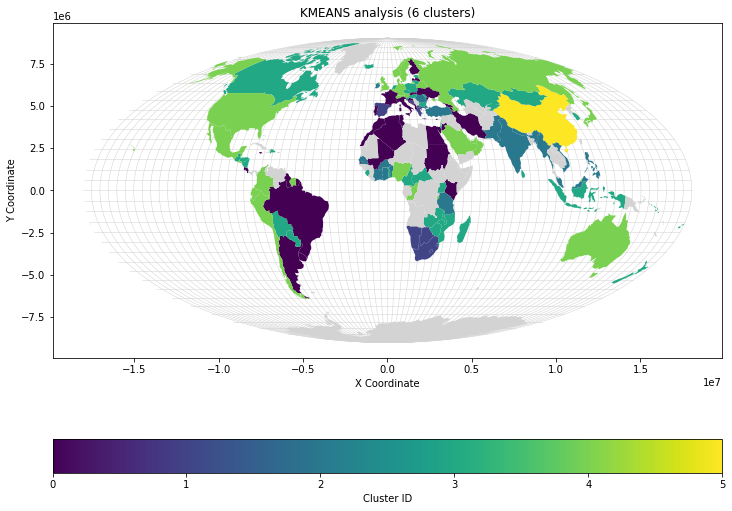

In [30]:
plt.show()
plot_map(geo_result_mollweide, graticules_mollweide, "KMEANS analysis (" + str(n_clusters) + " clusters)")
plt.savefig('KMEANS_full_mollweide.png')

| Cluster id | gdp_growth                          | hitech_exports                      | unemployment_ilo                    |
|------------|-------------------------------------|-------------------------------------|-------------------------------------|
| 0          | <font color='blue'>LOW</font>       | <font color='blue'>LOW</font>       | <font color='red'>HIGH</font>       |
| 1          | <font color='orange'>MEDIUM </font> | <font color='orange'>MEDIUM </font> | <font color='orange'>MEDIUM </font> |
| 2          | <font color='red'>HIGH</font>       | <font color='red'>HIGH</font>       | <font color='blue'>LOW</font>       |
| 3          | <font color='blue'>LOW</font>       | <font color='red'>HIGH</font>       | <font color='orange'>MEDIUM </font> |
| 4          | <font color='orange'>MEDIUM </font> | <font color='blue'>LOW</font>       | <font color='red'>HIGH</font>       |
| 5          | <font color='red'>HIGH</font>       | <font color='orange'>MEDIUM </font> | <font color='blue'>LOW</font>       |

## Individual Clusters maps

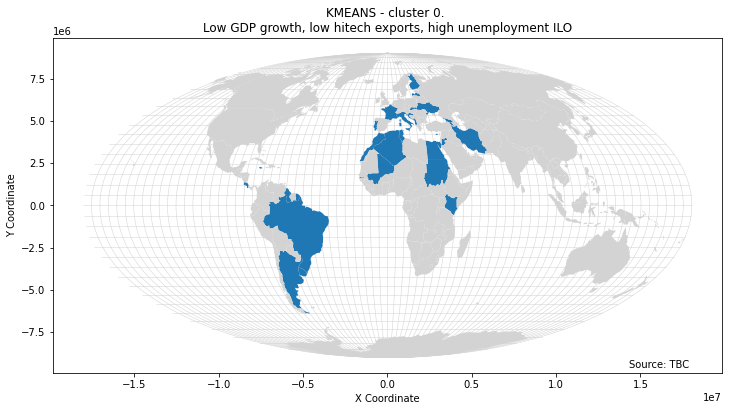

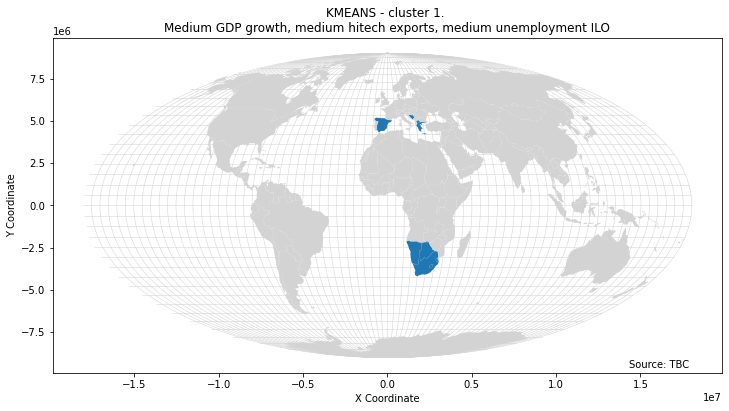

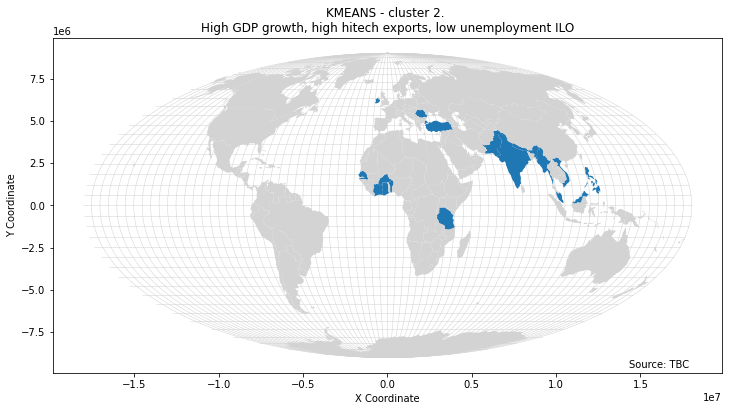

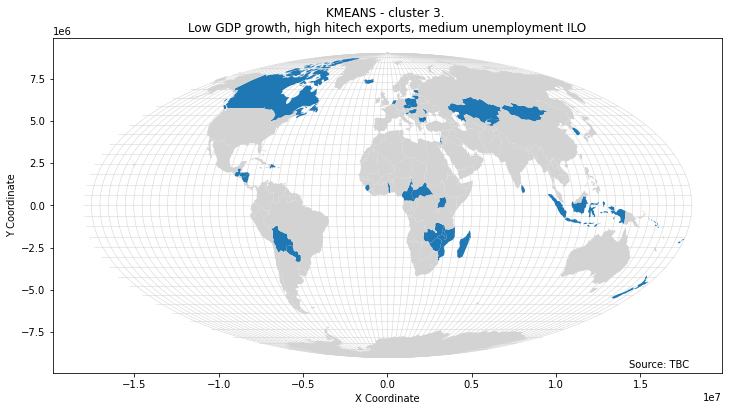

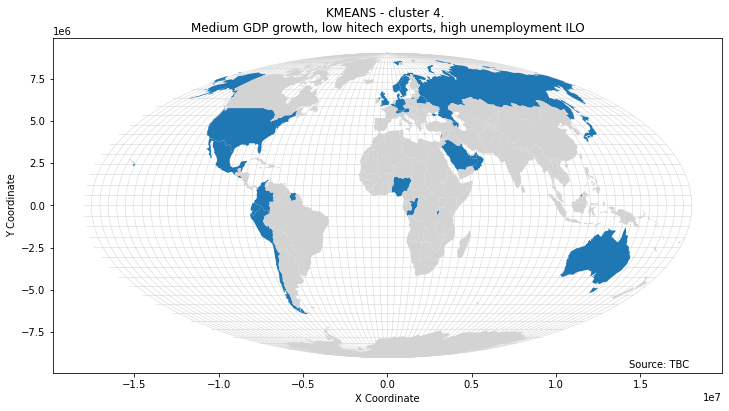

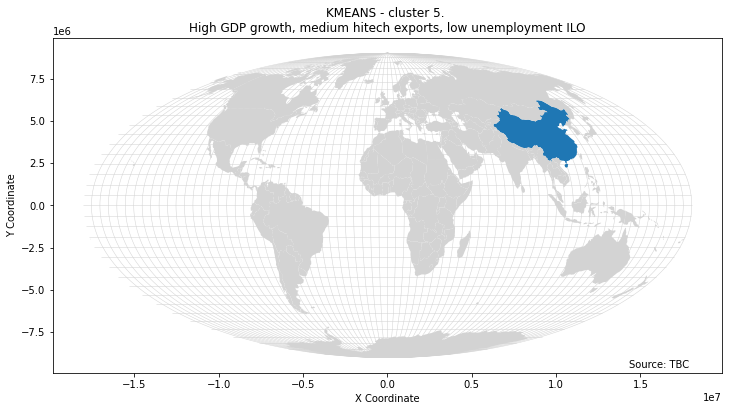

In [31]:
for i in range(1, n_clusters+1):
    geo_result_mollweide.loc[geo_result_mollweide['clusterId'] == i-1, 'cluster_' + str(i-1)] = 'True'
    plot_cluster(geo_result_mollweide, graticules_mollweide,str(i-1), "KMEANS - cluster "+str(i-1) +'. \n' + clusters_list[i-1])
    plt.savefig('KMEANS_cluster_' + str(i) + '.png')

